# Fashion-MNIST Project

Please read the following instructions carefully:

This project includes machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages. 

### Imports for Assignment

In [1]:
# General imports
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Tensorflow for data downloading/loading
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Scikit-learn for model testing and evaluation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# OpenCV for image processing 
import cv2

#### Load/download and normalize the FashionMNIST training and test datasets

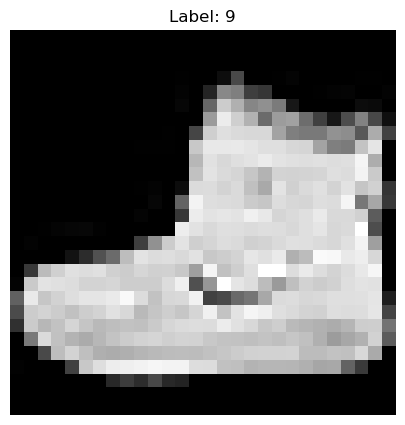

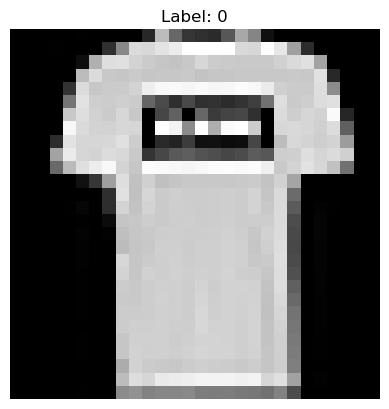

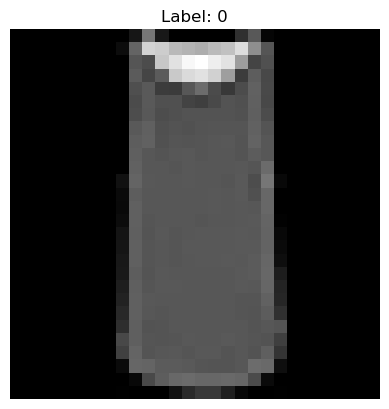

(10000,)
CPU times: total: 406 ms
Wall time: 758 ms


In [2]:
%%time

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1 
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the images from 28x28 to a vector of 784
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Convert images back to 28x28 for visualization
X_train_images = X_train.reshape(-1, 28, 28)

# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

print(y_test.shape)

#### 5 images from the training set in a row, and showing the corresponding category name (e.g. T-shirt, Dress, Bag, etc.)

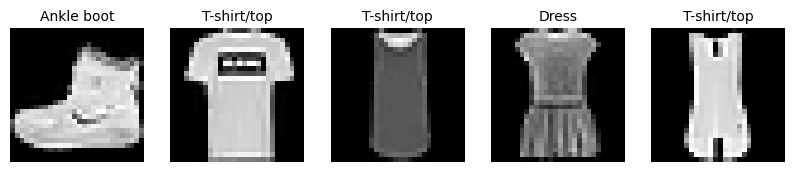

In [3]:
# Define a dictionary with labels
label_descriptions = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Create a DataFrame from the label and setting label column as the index
label_df = pd.DataFrame(list(label_descriptions.items()), columns=['Label', 'Description']).set_index('Label')

# Visualize 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    label_name = label_df.loc[y_train[i], 'Description'] # Setting lavel names
    plt.title(label_name, fontsize=10)
    plt.axis('off')

plt.show()

#### Applying a support vector classifier on the above (training) data. And using the learned/trained classifier to predict the category value on the test set
#### The parameters used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default

### Full Data Set

**Fitting the Data**

In [4]:
%%time

# Create a Support Vector Classifier
svm_classifier = SVC(kernel='linear', C=0.025)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")

Accuracy: 0.8573
CPU times: total: 2min 19s
Wall time: 4min 46s


**Plotting Samples**

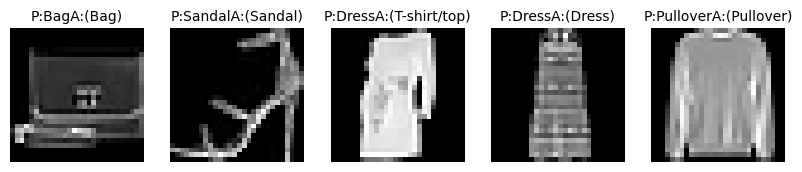

Precision: 0.8558656023283322 Recall: 0.8573 F1 Score: 0.8560662767592706


In [5]:
# Set up X test images for plt
X_test_images = X_test.reshape(-1, 28, 28)

# Set figure size
plt.figure(figsize=(10, 5))

# Plot 5 random images and their predictions
for i in range(5):
    plt.subplot(2, 5, i + 1)
    # Random images picked
    rand_img = np.random.randint(0, 10000)
    plt.imshow(X_test_images[rand_img], cmap='gray')
    actual_name = label_df.loc[y_test[rand_img], 'Description']
    predicted_name = label_df.loc[y_pred_svm[rand_img], 'Description'] 
    plt.title(f"P:{predicted_name}A:({actual_name})", fontsize=10)
    plt.axis('off')

plt.show()

# Classification Report, final report at the end
svm_class_report = classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm, recall_svm, f1_svm, _ = svm_class_report['weighted avg'].values()
print(f"Precision: {precision_svm} Recall: {recall_svm} F1 Score: {f1_svm}")

#### Used a neural network (i.e. MLP classifier) and training it for 1000 numebr of iterations, with the L2 penalty of 1

In [6]:
# Create and configure the MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),   # Single hidden layer with 100 neurons
    max_iter=1000,               # Maximum number of iterations
    alpha=1.0,                   # L2 penalty (regularization strength)
    random_state=42              # Random seed for reproducibility
)

### Full Data Set

**Fitting the Data**

In [7]:
%%time

# Standardize the feature (mean=0 and variance=1)
scaler = StandardScaler()
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)

# Train the MLP classifier
mlp_classifier.fit(X_train_mlp, y_train)

# Make predictions on the testing data
y_pred_mlp = mlp_classifier.predict(X_test_mlp)

# Evaluate the accuracy of the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp}")

Accuracy: 0.8772
CPU times: total: 2min 34s
Wall time: 50.8 s


**Plotting Samples**

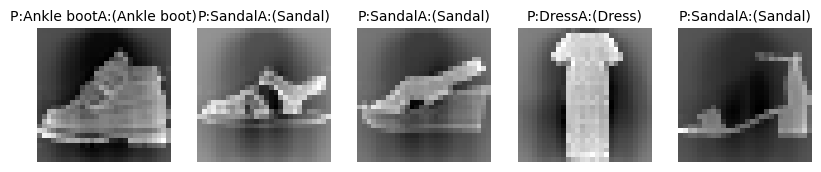

Precision: 0.8773744203654216 Recall: 0.8772 F1 Score: 0.8770696226898894


In [8]:
# Visualize 5 sample images
plt.figure(figsize=(10, 5))

# Set up X test images for plt
X_test_mlp_images = X_test_mlp.reshape(-1, 28, 28)

# Plot 5 random images and their predictions
for i in range(5):
    plt.subplot(2, 5, i + 1)
    # Random images picked
    rand_img = np.random.randint(0, 10000)
    plt.imshow(X_test_mlp_images[rand_img], cmap='gray')
    actual_name = label_df.loc[y_test[rand_img], 'Description']
    predicted_name = label_df.loc[y_pred_mlp[rand_img], 'Description'] 
    plt.title(f"P:{predicted_name}A:({actual_name})", fontsize=10)
    plt.axis('off')

plt.show()

# Classification Report
mlp_class_report = classification_report(y_test, y_pred_mlp, output_dict=True)
precision_mlp, recall_mlp, f1_mlp, _ = mlp_class_report['weighted avg'].values()
print(f"Precision: {precision_mlp} Recall: {recall_mlp} F1 Score: {f1_mlp}")

#### Applied a Sobel edge detector on the above dataset images (both training and testing), then trained the same MLP classifier as above, showed the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reproted the main classification matrics

#### Similarly, applied a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then trained the same MLP classifier, showed the prediction, and the metrics, same as above. Compared the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification

### Sobel Edge Detector

In [9]:
%%time

# Sobel edge detector function for each dataset
def sobel_edge_image(data):
    sobel_img = []
    for img in data:
        # Compute the gradient
        sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
        sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
        # Compute the magnitude
        xy_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        # Append and flatten for processing
        sobel_img.append(xy_magnitude.flatten())
    # Return a numpy version of it for mlp
    return np.array(sobel_img)

# Apply function on training and testing data
X_train_sobel = sobel_edge_image(X_train)
X_test_sobel = sobel_edge_image(X_test)

# Standardize the data for mlp
X_train_sobel_mlp = scaler.fit_transform(X_train_sobel)
X_test_sobel_mlp = scaler.transform(X_test_sobel)

# Train the MLP classifier
mlp_classifier.fit(X_train_sobel_mlp, y_train)

# Make predictions on the testing data
y_pred_sobel_mlp = mlp_classifier.predict(X_test_sobel_mlp)

# Evaluate the accuracy of the model
accuracy_sobel_mlp = accuracy_score(y_test, y_pred_sobel_mlp)
print(f"Accuracy: {accuracy_sobel_mlp}")       

Accuracy: 0.8828
CPU times: total: 2min 58s
Wall time: 1min 6s


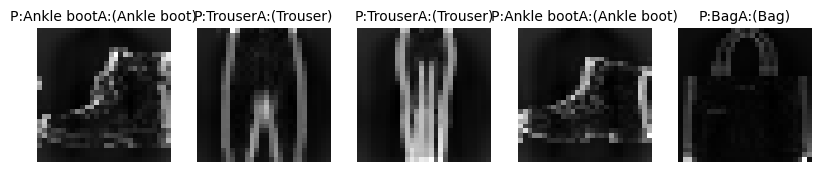

Precision: 0.8829087772017487 Recall: 0.8828 F1 Score: 0.8822178186835674


In [10]:
# Set up X test images for plt
X_test_sobel_images = X_test_sobel_mlp.reshape(-1, 28, 28)

# Visualize 5 sample images
plt.figure(figsize=(10, 5))

# Plot 5 random images and their predictions
for i in range(5):
    # Random images picked
    rand_img = np.random.randint(0, 10000)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_sobel_images[rand_img], cmap='gray')
    actual_name = label_df.loc[y_test[rand_img], 'Description']
    predicted_name = label_df.loc[y_pred_sobel_mlp[rand_img], 'Description'] 
    plt.title(f"P:{predicted_name}A:({actual_name})", fontsize=10)
    plt.axis('off')

plt.show()

# Classification Report
mlp_sobel_class_report = classification_report(y_test, y_pred_sobel_mlp, output_dict=True)
precision_sobel_mlp, recall_sobel_mlp, f1_sobel_mlp, _ = mlp_sobel_class_report['weighted avg'].values()
print(f"Precision: {precision_sobel_mlp} Recall: {recall_sobel_mlp} F1 Score: {f1_sobel_mlp}")

### Bilateral Filter

In [11]:
%%time

# Bilateral Filter for each set
def bilateral_filter_image(data):
    blt_img = [] # blt: bilateral
    for img in data:
        # Convert to 8 bit format
        img_8u = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        #Apply filter to each image
        blt_image = cv2.bilateralFilter(img_8u, d=9, sigmaColor=85, sigmaSpace=85)
        # Append and flatten for processing
        blt_img.append(blt_image.flatten())
    # Return a numpy version of it for mlp
    return np.array(blt_img)

# Apply function on training and testing data
X_train_blt = bilateral_filter_image(X_train)
X_test_blt = bilateral_filter_image(X_test)

# Standardize the data for mlp
X_train_blt_mlp = scaler.fit_transform(X_train_blt)
X_test_blt_mlp = scaler.transform(X_test_blt)

# Train the MLP classifier
mlp_classifier.fit(X_train_blt_mlp, y_train)

# Make predictions on the testing data
y_pred_blt_mlp = mlp_classifier.predict(X_test_blt_mlp)

# Evaluate the accuracy of the model
accuracy_blt_mlp = accuracy_score(y_test, y_pred_blt_mlp)
print(f"Accuracy: {accuracy_blt_mlp}")  

Accuracy: 0.8676
CPU times: total: 8min 56s
Wall time: 2min 55s


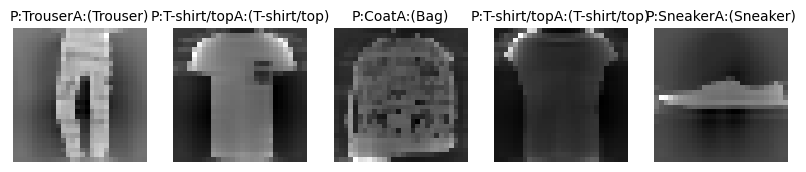

Precision: 0.8679626074401707 Recall: 0.8676 F1 Score: 0.8660257338621917


In [12]:
# Set up X test images for plt
X_test_blt_images = X_test_blt_mlp.reshape(-1, 28, 28)

# Visualize 5 sample images
plt.figure(figsize=(10, 5))

# Plot 5 random images and their predictions
for i in range(5):
    plt.subplot(2, 5, i + 1)\
    
    # Random images picked
    rand_img = np.random.randint(0, 10000)
    plt.imshow(X_test_blt_images[rand_img], cmap='gray')
    actual_name = label_df.loc[y_test[rand_img], 'Description']
    predicted_name = label_df.loc[y_pred_blt_mlp[rand_img], 'Description'] 
    plt.title(f"P:{predicted_name}A:({actual_name})", fontsize=10)
    plt.axis('off')

plt.show()

# Classification Report
mlp_blt_class_report = classification_report(y_test, y_pred_blt_mlp, output_dict=True)
precision_blt_mlp, recall_blt_mlp, f1_blt_mlp, _ = mlp_blt_class_report['weighted avg'].values()
print(f"Precision: {precision_blt_mlp} Recall: {recall_blt_mlp} F1 Score: {f1_blt_mlp}")

### Accuracy Plot

         Model  Accuracy  Precision  Recall  F1 Score
0          SVM    0.8573   0.855866  0.8573  0.856066
1          MLP    0.8772   0.877374  0.8772  0.877070
2    Sobel MLP    0.8828   0.882909  0.8828  0.882218
3  Bilater MLP    0.8676   0.867963  0.8676  0.866026


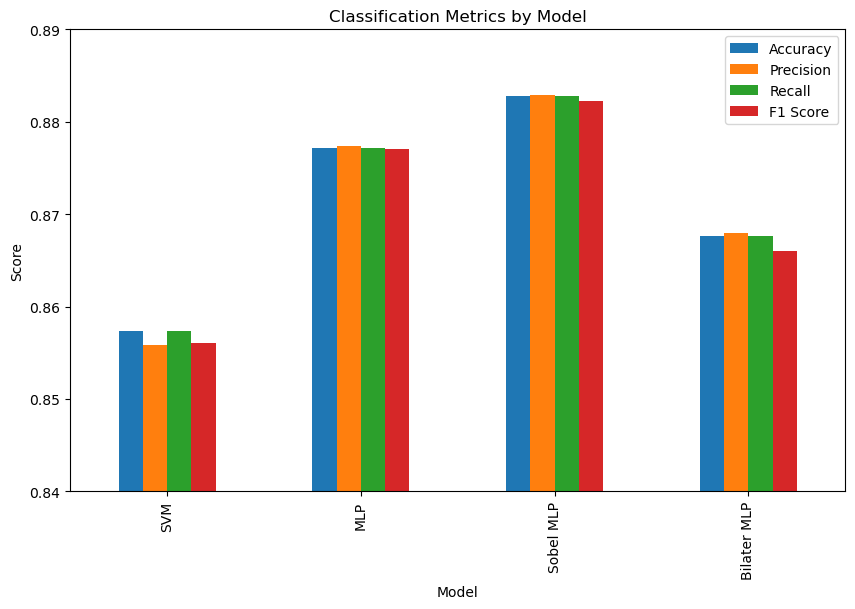

In [13]:
# Create a dataframe with the accuracies and labels
df = pd.DataFrame({
    'Model': ['SVM', 'MLP', 'Sobel MLP', 'Bilater MLP'], 
    'Accuracy': [accuracy_svm, accuracy_mlp, accuracy_sobel_mlp, accuracy_blt_mlp],
    'Precision': [precision_svm, precision_mlp, precision_sobel_mlp, precision_blt_mlp],
    'Recall': [recall_svm, recall_mlp, recall_sobel_mlp, recall_blt_mlp],
    'F1 Score': [f1_svm, f1_mlp, f1_sobel_mlp, f1_blt_mlp]
})

print(df)

# Plot the accuracies for comparison
df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.xlabel('Model')
plt.ylim(0.84, 0.89)
plt.ylabel('Score')
plt.title('Classification Metrics by Model')
plt.show()

# Summary

The Sobel MLP model appears to be the best performer among the tested models, with the highest accuracy and well-balanced precision, recall, and F1 score. It suggests that the Sobel edge detection technique contributes positively to the classification task.